In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn import metrics
import statsmodels.api as sm
import random

In [2]:
#opening cleaned out file
diamonds_no_color_cleaned = pd.read_csv("diamonds_no_color_cleaned.csv")

In [3]:
#dropping not needed column ship_date and new added column of index
diamonds_no_color_cleaned = diamonds_no_color_cleaned.drop(["Unnamed: 0"],axis=1)
diamonds_no_color_cleaned = diamonds_no_color_cleaned.drop(["price_log"],axis=1)

In [4]:
#assiging Target value and incorporating features
target = diamonds_no_color_cleaned['price']
features = diamonds_no_color_cleaned.drop(['price'], axis=1)

In [44]:
features.shape

(7521, 17)

In [5]:
#OLS Model of target and features
#summary of the OLS Model
ols_model = sm.OLS(target,features).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              2120.
Date:                Fri, 08 May 2020   Prob (F-statistic):                        0.00
Time:                        09:02:29   Log-Likelihood:                         -71124.
No. Observations:                7521   AIC:                                  1.423e+05
Df Residuals:                    7504   BIC:                                  1.424e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
carat                   1.015e+04     65.075    155.941      0.000       1e+04    1.03e+04
color                    -16.6560      1.570    -10.611      0.000     -19.733     -13.579
clarity                   -0.2447      2.188     -0.112      0.911      -4.534       4.044
cut                       51.4787      6.229      8.264      0.000      39.268      63.690
authentication          -318.2261     14.842    -21.441      0.000    -347.321    -289.131
natural                  654.5001     33.585     19.488      0.000     588.663     720.337
shape_cushion          -1734.6710    303.753     -5.711      0.000   -2330.113   -1139.229
shape_cushion_modified -2428.4678    236.748    -10.258      0.000   -2892.560   -1964.375
shape_emerald          -3158.1542    204.069    -15.476      0.000   -3558.187   -2758.121
shape_heart            -1430.8768    196.728     -7.273      0.000   -1816.518   -1045.236
shape_marquise          -792.9409    197.837     -4.008      0.000   -1180.757    -405.125
shape_oval              -663.1314    165.068     -4.017      0.000    -986.710    -339.552
shape_pear              -736.3712    165.648     -4.445      0.000   -1061.087    -411.656
shape_princess          -347.4593    253.134     -1.373      0.170    -843.673     148.754
shape_radiant          -2290.8284    191.410    -11.968      0.000   -2666.045   -1915.612
shape_radient          -1.017e+04   3110.911     -3.268      0.001   -1.63e+04   -4068.391
shape_round             -919.5092    248.771     -3.696      0.000   -1407.169    -431.849
==============================================================================
Omnibus:                     4529.114   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123768.890
Skew:                           2.400   Prob(JB):                         0.00
Kurtosis:                      22.285   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
diamonds_no_color_cleaned.price.describe()

count     7521.000000
mean      2863.097992
std       6886.059480
min        210.000000
25%        630.000000
50%       1000.000000
75%       1940.000000
max      50140.000000
Name: price, dtype: float64

In [7]:
diamonds_no_color_cleaned.shape

(7521, 18)

# Train Test Splitting

In [8]:
#train test splitting data
#80% for training
#20% for testing
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2)
scaler = MinMaxScaler()
lr_model = LinearRegression()

In [9]:
#Scale data using min/max scaler
X_train = scaler.fit_transform(X_train)
X_train
X_test = scaler.transform(X_test)
X_test

array([[0.03298969, 0.77777778, 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.15257732, 0.22222222, 0.57142857, ..., 0.        , 0.        ,
        0.        ],
       [0.09896907, 1.        , 0.57142857, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11340206, 1.        , 0.57142857, ..., 0.        , 0.        ,
        0.        ],
       [0.01649485, 0.22222222, 0.42857143, ..., 0.        , 0.        ,
        1.        ],
       [0.38556701, 0.88888889, 0.57142857, ..., 0.        , 0.        ,
        0.        ]])

# Linear Model

In [10]:
#fittin x/y training and testing values with linear model
lr_diamond_model = lr_model.fit(X_train,y_train)
lr_diamond_test_model = lr_model.fit(X_test,y_test)

### Linear Model Training Result

In [11]:
#RMSE and accuracy result from linearing model x/y training
y_train_pred = lr_diamond_model.predict(X_train)
lr_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
lr_training_accuracy = lr_diamond_model.score(X_train,y_train)

In [12]:
print("training RMSE score(lr model):", lr_train_rmse)
print("training accuracy(lr model):", lr_training_accuracy)

training RMSE score(lr model): 2444.2308991382642
training accuracy(lr model): 0.8800604187110709


### Linear Model Test Result

In [13]:
#RMSE and accuracy result from linearing model x/y testing
y_test_pred = lr_diamond_test_model.predict(X_test)
lr_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
lr_test_accuracy = lr_diamond_test_model.score(X_test,y_test)

In [14]:
print("testing RMSE score(lr model):", lr_test_rmse)
print("testing accuracy(lr model):", lr_training_accuracy)

testing RMSE score(lr model): 2281.8816382715263
testing accuracy(lr model): 0.8800604187110709


In [43]:
lr_test_rmse / y_test.std()

0.39665284981028226

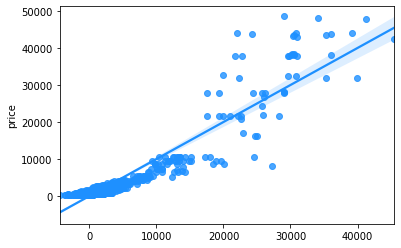

In [15]:
sns.regplot(y_test_pred, y_test, lowess=False, color="dodgerblue")

# Lasso Model

In [16]:
#fitting x/y training and testing values with lasso model
lasso = Lasso(normalize=False)
training_lasso = lasso.fit(X_train, y_train)
testing_lasso = lasso.fit(X_test, y_test)

### Lasso training Result

In [17]:
#RMSE and accuracy result from lasso model x/y training
lasso_y_train_pred = training_lasso.predict(X_train)
lasso_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, lasso_y_train_pred))
lasso_training_accuracy = training_lasso.score(X_train,y_train)

In [18]:
print("training RMSE score(lasso model):", lasso_train_rmse)
print("training accuracy(lasso model):", lasso_training_accuracy)

training RMSE score(lasso model): 2447.551767175459
training accuracy(lasso model): 0.8797342841378635


### Lasso test Result

In [19]:
#RMSE and accuracy result from lasso model x/y testing
lasso_y_test_pred = testing_lasso.predict(X_test)
lasso_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, lasso_y_test_pred))
lasso_testing_accuracy = testing_lasso.score(X_test,y_test)

In [20]:
print("testing RMSE score(lasso model):", lasso_test_rmse)
print("testing accuracy(lasso model):", lasso_testing_accuracy)

testing RMSE score(lasso model): 2282.50477536322
testing accuracy(lasso model): 0.8619126343938978


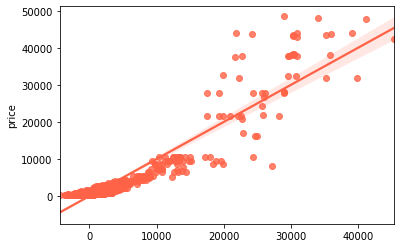

In [21]:
sns.regplot(lasso_y_test_pred, y_test, lowess=False, color="tomato")

# Ridge Model

In [22]:
#fitting x/y training and testing values with ridge model
ridge = Ridge()
ridge_train_model = ridge.fit(X_train,y_train)
ridge_test_model = ridge.fit(X_test,y_test)

### Ridge Training Result

In [23]:
#RMSE and accuracy result from ridge model x/y training
ridge_y_train_pred = ridge_train_model.predict(X_train)
ridge_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, ridge_y_train_pred))
ridge_training_accuracy = ridge_train_model.score(X_train,y_train)

In [24]:
print("training RMSE score(Ridge model):", ridge_train_rmse)
print("training accuracy(Ridge model):", ridge_training_accuracy)

training RMSE score(Ridge model): 2512.8942741472233
training accuracy(Ridge model): 0.8732270776048275


### Ridge Test Result

In [25]:
#RMSE and accuracy result from ridge model x/y testing
ridge_y_test_pred = ridge_test_model.predict(X_test)
ridge_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, ridge_y_test_pred))
ridge_testing_accuracy = ridge_test_model.score(X_test,y_test)

In [26]:
print("testing RMSE score(Ridge model):", lasso_test_rmse)
print("testing accuracy(Ridge model):", lasso_testing_accuracy)

testing RMSE score(Ridge model): 2282.50477536322
testing accuracy(Ridge model): 0.8619126343938978


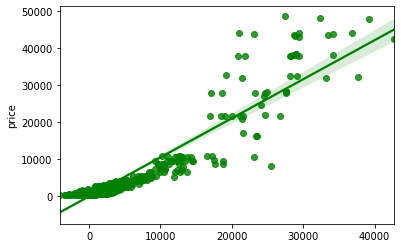

In [27]:
sns.regplot(ridge_y_test_pred, y_test, lowess=False, color="green")

# F-Test to see best features (not scaled)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2)
lr_model = LinearRegression()

In [29]:
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [30]:
#unused variables
list(removed_columns)

['color',
 'clarity',
 'shape_cushion',
 'shape_cushion_modified',
 'shape_emerald',
 'shape_heart',
 'shape_radient']

In [31]:
#recommended features
list(selected_columns)

['carat',
 'cut',
 'authentication',
 'natural',
 'shape_marquise',
 'shape_oval',
 'shape_pear',
 'shape_princess',
 'shape_radiant',
 'shape_round']

In [32]:
#assiging Target value and incorporating features did not use table percent because of high correlation between
#table_percent and table_depth_ratio
#replaced with next best recommended feature : shape pear
target2 = diamonds_no_color_cleaned['price']
features2 = diamonds_no_color_cleaned.drop(['price','color','clarity','shape_cushion','shape_cushion_modified','shape_emerald','shape_heart','shape_radient'],axis=1)

In [45]:
features2

,carat,cut,authentication,natural,shape_marquise,shape_oval,shape_pear,shape_princess,shape_radiant,shape_round
0,0.30,20,50,20,0,0,0,0,0,1
1,0.30,10,50,20,0,0,0,0,0,1
2,0.30,40,50,20,0,0,0,0,0,1
3,0.30,40,50,20,0,0,0,0,0,1
4,0.41,10,50,20,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7516,3.22,40,50,20,0,0,0,0,0,1
7517,3.03,40,50,20,0,0,0,0,0,1
7518,3.50,40,50,20,0,0,0,0,0,1
7519,4.23,40,50,20,0,0,0,0,0,1


# Linear Test w/ F-Test Recommendation

In [33]:
#New Test based off F-Test recommendations
X_train,X_test,y_train,y_test = train_test_split(features2,target2,test_size=0.2)
lr_model = LinearRegression()
#Scale data using min/max scaler
X_train = scaler.fit_transform(X_train)
X_train
X_test = scaler.transform(X_test)
X_test

array([[0.01446281, 0.4       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.06404959, 0.4       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03512397, 0.4       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.16735537, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11363636, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09504132, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [34]:
#fittin x/y training and testing values with linear model
lr_diamond_model = lr_model.fit(X_train,y_train)
lr_diamond_test_model = lr_model.fit(X_test,y_test)

### Linear Test Result (Training) w/ Rec

In [35]:
#RMSE and accuracy result from linearing model x/y training
y_train_pred = lr_diamond_model.predict(X_train)
lr_train_rmse = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
lr_training_accuracy = lr_diamond_model.score(X_train,y_train)

In [36]:
print("training RMSE score(lr model):", lr_train_rmse)
print("training accuracy(lr model):", lr_training_accuracy)

training RMSE score(lr model): 2565.1746342434535
training accuracy(lr model): 0.8593520127896338


### Linear Test Result (Testing) w/ Rec

In [37]:
#RMSE and accuracy result from linearing model x/y testing
y_test_pred = lr_diamond_test_model.predict(X_test)
lr_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
lr_test_accuracy = lr_diamond_model.score(X_test,y_test)

In [38]:
print("testing RMSE score(lr model):", lr_test_rmse)
print("testing accuracy(lr model):", lr_training_accuracy)

testing RMSE score(lr model): 2803.401934519405
testing accuracy(lr model): 0.8593520127896338


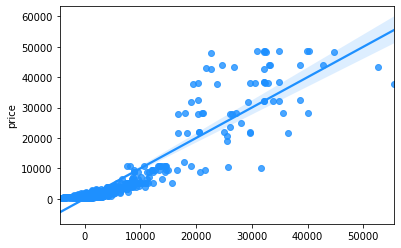

In [39]:
sns.regplot(y_test_pred, y_test, lowess=False, color="dodgerblue")

In [40]:
ols_model = sm.OLS(target2,features2).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              3279.
Date:                Fri, 08 May 2020   Prob (F-statistic):                        0.00
Time:                        09:13:42   Log-Likelihood:                         -71418.
No. Observations:                7521   AIC:                                  1.429e+05
Df Residuals:                    7511   BIC:                                  1.429e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
carat           9811.2437     64.790    151.432      0.000    9684.238    9938.249
cut               30.0801      4.838      6.218      0.000      20.597      39.563
authentication  -523.4033     12.272    -42.649      0.000    -547.460    -499.346
natural         1051.4976     30.012     35.036      0.000     992.665    1110.330
shape_marquise   455.7346    172.302      2.645      0.008     117.975     793.494
shape_oval       388.2697    128.319      3.026      0.002     136.728     639.812
shape_pear       327.4271    128.257      2.553      0.011      76.008     578.846
shape_princess  1269.1772    190.522      6.662      0.000     895.701    1642.654
shape_radiant  -1089.3809    169.174     -6.439      0.000   -1421.009    -757.753
shape_round     1181.9113    163.979      7.208      0.000     860.466    1503.357
==============================================================================
Omnibus:                     4247.397   Durbin-Watson:                   0.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122125.578
Skew:                           2.169   Prob(JB):                         0.00
Kurtosis:                      22.259   Cond. No.                         313.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""